# Importing Modules

# ADRIAN AGUILAR
# TASK # 3 - Build and Evaluate Models

## INTRODUCTION
Now that you have properly prepared and thoroughly explored the data it's time to begin the modeling process. Throughout this task will examine feature selection and model building through the use of the Python module called Sci-Kit Learn. Is very important for you to understand that this task uses the CreditOne data in a regression type problem, but your final analysis will be centered on classification. The steps will be very similar, but you will need to replicate and them in a different way and obviously on different features and variables. Let's get started with an introduction to Sci-Kit Learn and how it differs from what you've already done with caret and R.

1. Selecting and Dividing the Data
Introduction to Sci-Kit Learn 
TIP:
Remember that everything you will be doing in this task is centered around a regression problem using the CreditOne data, but your final models will be built for a classification problem. This regression problem is being introduced to walk you through learning 'how' to use Sci-Kit Learn

You have already installed the Sci-Kit Learn library on your machine so take a few minutes and come up to speed on how to use it. As you'll see it is not very different from using caret in R, but there are a few key differences, specifically:

It is much faster than caret in R
The pipeline is easier to work with
Models can easily be serialized for deployment 
More more metrics are available
Feature and variable selection is in the form of indices
Data is stored and accessed in arrays consisting of samples and features


Data Structure
The library comes pre-loaded with several datasets that follow a specific structure. Specifically, from the Sci-Kit Learn website:

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples, n_features array. In the case of supervised problem, one or more response variables are stored in the .target member.

For example: If we examine the features of the pre-loaded Digits dataset the following structure can be seen:


Similarly, if we examine the dependent variable of the Digits dataset we see the following; these are just the outcomes that are related to the observations in data above:


This format will seem different from anything you've experienced so far especially with R, but in the majority of cases will find you using your own data so you can use Pandas to assist with the structuring of your data into the following four areas required by Sci-Kit Learn:



Here is a description of each area and how it resembles what you already know from your previous work(In R you created test/train sets like these with createDataPartition in caret):

Training Data is divided into two parts: one set for the features (X-values) and a related set for the outcomes (y-values). 
Both of the should match your training split size (75%, for example).
Testing data follows the same rules and contains two sets: one for the X-values or features and a second for the ground truth (y_test), which you'll use to compare your predictions to.
Testing data is composed of what is left over from the training data (25%, for example).
Now that you have a general understanding of how this module and process works lets import the modules and the data. In a few more steps we'll select the features and the divide the data into training and testing sets:

1.Start a new notebook and save it as CreditOne Regression

2. Import the modules you'll need for this task as shown below (we'll learn more about some of these later):



       
    


In [1]:
#Imports from Module 3 
import math
import seaborn as sns 
%matplotlib inline
import numpy as np
import pandas as pd


#Imports from Module 3 
#imports 
#numpy, pandas, scipy, math, matplotlib
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVR, SVC
from sklearn import svm 
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler, LabelEncoder


#model metrics 
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score

#cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline

#GradientBoostingClassifier 
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

from math import sqrt

In [2]:
#ds = pd.io.parsers.read_csv("default of credit card clients.csv")
raw = pd.read_csv('default of credit card clients.csv', header =1)

In [3]:
#In order to check the data types of each variable you can use the info() function of Pandas as follows:
raw.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Count Missing Values in DataFrame

In [4]:
raw.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
#In order to check the data types of each variable you can use the info() function of Pandas as follows:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# # 2 Covariance

In [6]:
covMat = raw.cov()
print(covMat)

#TIP:
#Note: Notice that the 'ID' is shown in the matrix above?
#Be sure to use iloc when establishing your variable so you can select the specific 
#features/variables you want to measure.


                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

### “Covariance”
indicates the direction of the linear relationship between variables.
“Correlation” on the other hand measures both the strength 
and direction of the linear relationship between two variables.
Correlation is a function of the covariance. 

# Covarianza: definicion 
https://www.youtube.com/watch?v=XW-yuLXX4PY


Relacion directa:
Cuando entre las dos variables hay una relacion direccta, 
la covarianza da un valor positivo.

Relacion inversa:
 Cuando entre las dos variables hay una relacion inversa,
la covarianza da un valor negativ0

No relacion:
 Cuando entre las dos variables no hay una relacion,
la covariza da un valor en torno a cero.


###  1
Now that we've reviewed all of the basic components used in exploratory data analysis it is time for you to perform this analysis on all of the CreditOne data so you can fully understand the relevance of all features and how they impact one another and, most importantly, customer default.

#Here are some guidelines that will help you:

#For this task your EDA should resemble to depth of the Titanic EDA example provided in the resources.
#As you explore the data remember the whole purpose of EDA is to answer questions and summarize 
#the main points found in the data.
#This is done both with Statistical methods as well as visualization methods and we've only introduced 
#a few of both here to help you proceed.
#It is your job as a Data Scientist to provide the best solution for this problem.

### Selecting Data
Using R, it is easy to select features and dependent variables with the semantics of the language. Python makes this easy as well, but we'll use Pandas to assist with the task. Let's examine how this is done.

As you are aware, you can select data in R by using indices in the following format: [rows,columns]. Pandas has a similar function for doing this; it is referred to as purely integer location-based indexing for selection by position. Here is how it works.

Every column in the data is assigned a location number or index; here is a visual example:


If we want to select any given column we would use the location number and the name of the dataframe as follows: 

### 3. (EDA) Exploratory Data Analysis 

In [7]:
#Group by gender - Gender (1 = male; 2 = female)
raw.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

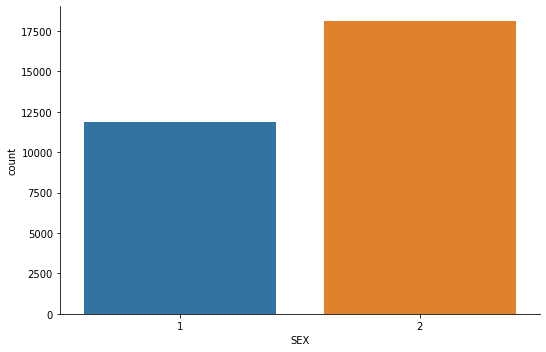

In [8]:
# Instead of a group by, use seaborn to plot the count of users for each sex
sx = sns.catplot('SEX', data=raw, kind='count', aspect=1.5)

#Majority are female 
#Gender (1 = male; 2 = female)

In [9]:
#Group by Education 
raw.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

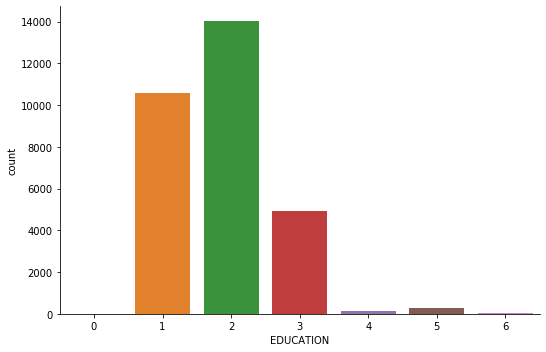

In [10]:
#Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
ed = sns.catplot('EDUCATION', data=raw, kind='count', aspect=1.5)

#Majority University / Graduate School or High School.

In [11]:
#Group by Marital Status  
raw.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

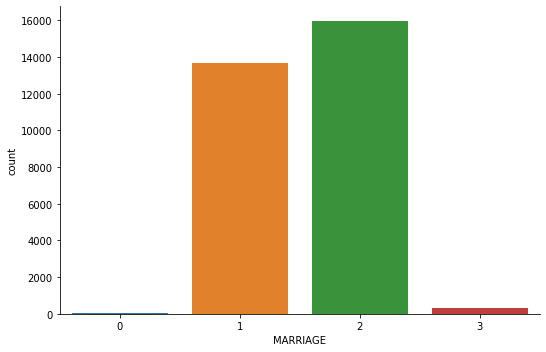

In [12]:
ma = sns.catplot('MARRIAGE', data=raw, kind='count', aspect=1.5)

#Majority Single or Married. 
#Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

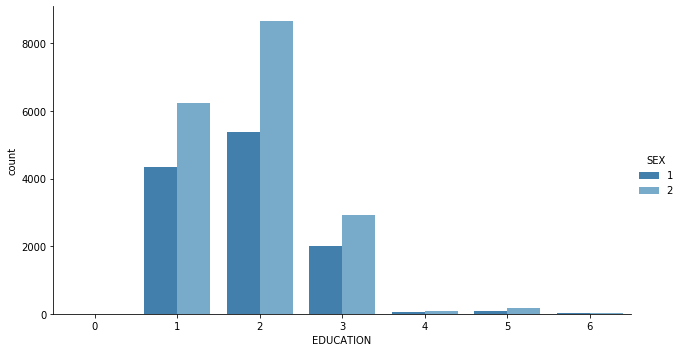

In [13]:
g = sns.catplot('EDUCATION', data=raw, hue='SEX', kind='count', aspect=1.75, palette="tab20c")
g.set_xlabels('EDUCATION')

In [14]:
# Number of customers with default payment next month in each education range group by sex 
raw.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)


EDUCATION,0,1,2,3,4,5,6,All
SEX,,,,,,,,
1,0,906,1408,545,4,6,4,2873
2,0,1130,1922,692,3,12,4,3763
All,0,2036,3330,1237,7,18,8,6636


In [15]:

No_Default_Payment = raw[raw['default payment next month']==0]

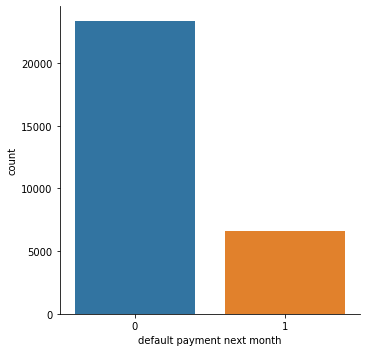

In [16]:
sns.catplot('default payment next month', data=raw, kind='count')

#client's behavior; Y=0 then not default, Y=1 then default"
#Majority doesn't have the default payment

In [17]:

#total not default payment
len(No_Default_Payment)

23364

In [18]:
raw.AGE.describe()
#Mean is 35 and 54 is the average

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [19]:
# Drop na values
age = raw['AGE'].dropna()

Text(0.5, 1.0, "Distribution of Customers' Ages")

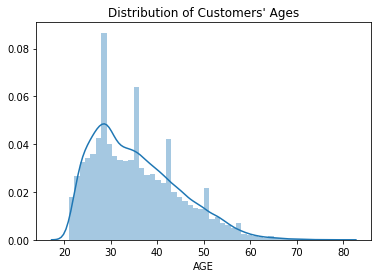

In [20]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers' Ages")
# pick of po[ulation is over ~25 pik 30 go down dramaticly]

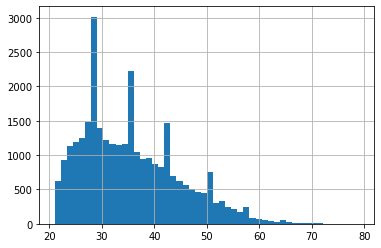

In [21]:
# Age Histograma
raw['AGE'].hist(bins=50)

### Plot, Distribution of Customer's Ages Grouped by Gender(SEX)

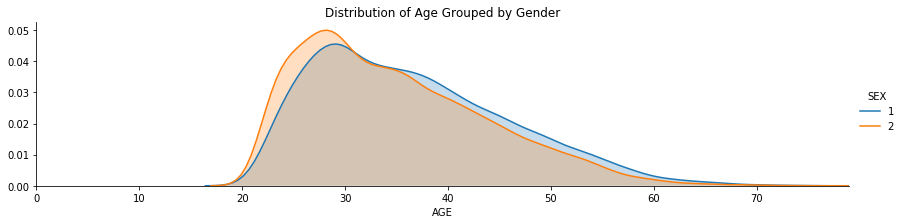

In [22]:
fig = sns.FacetGrid(raw, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = raw['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

## Distribution of Customer's Ages Grouped by Education

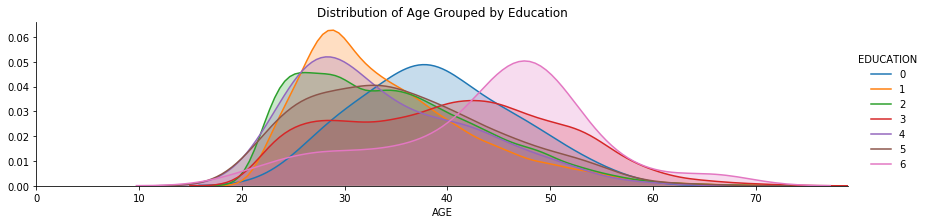

In [23]:
fig = sns.FacetGrid(raw, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = raw['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Education')
fig.add_legend()

### HISTOGRAM

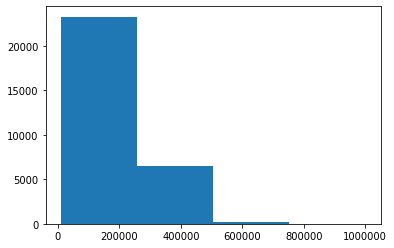

In [24]:
##Histogram 
plt.hist(raw['LIMIT_BAL'], bins=4)
plt.show()

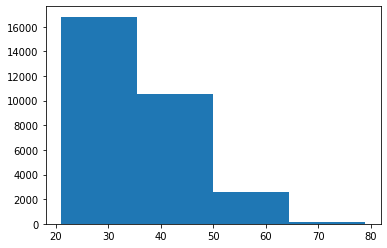

In [25]:
plt.hist(raw['AGE'], bins=4)
plt.show()

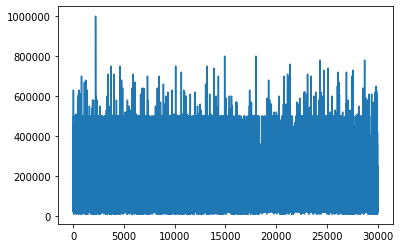

In [26]:
plt.plot(raw['LIMIT_BAL'])
plt.show()

#TIP:
#Note: There are numerous options for line plots (and all others). 
#Check the resources for additional information like adding axis and title information.

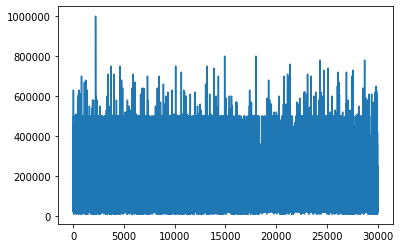

In [27]:
plt.plot(raw['LIMIT_BAL'])
plt.show()

#TIP:
#Note: There are numerous options for line plots (and all others). 
#Check the resources for additional information like adding axis and title information.

### BOX PLOTS

In [28]:
header = raw.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


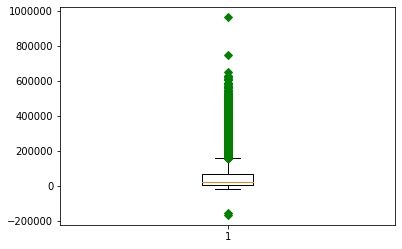

In [29]:
A = raw['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

#TIP:
#Note: See matplotlib in the resources

## 4. Feature Engineering (either PCA or RFE) and Dimensionality Reduction

In [30]:
#Data Dimensionality Reduction
bins = (20, 35, 60, 80)
group_names = ['Young', 'Adult', 'Old']
raw['AGE'] = pd.cut(raw['AGE'], bins = bins, labels = group_names)
raw['AGE'].unique()

[Young, Adult, Old]
Categories (3, object): [Young < Adult < Old]

In [31]:
label_quality = LabelEncoder()

In [32]:
raw['AGE'] = label_quality.fit_transform(raw['AGE'])

In [33]:
raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,2,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,2,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,2,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,0,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [34]:
raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,2,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,2,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,2,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,0,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
raw['AGE'].value_counts()

2    16809
0    12919
1      272
Name: AGE, dtype: int64

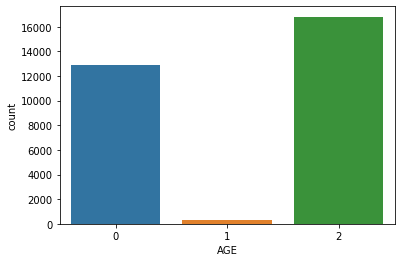

In [36]:
sns.countplot(raw['AGE'])
# ['Young', 'Adult', 'Old']

In [37]:
##Feature elimination
df = raw.drop(['ID', 'BILL_AMT4', 'BILL_AMT6'], axis=1) 
##removing variables like ID, and BILL_AMT4 and 6 due to correlation issues.

In [38]:
df['EDUCATION'].value_counts()

#df['EDUCATION'] = np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
#df['EDUCATION'] = np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
#df['EDUCATION'] = np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])
#df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

# 5. Classification (Build three model and choose the best)

### 5.1 Select the Feature

In [39]:
X = df.iloc[:,2:21]
X.head()

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,1,2,2,2,-1,-1,-2,-2,3913,3102,689,0,0,689,0,0,0,0
1,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3455,0,1000,1000,1000,0,2000
2,2,2,2,0,0,0,0,0,0,29239,14027,13559,14948,1518,1500,1000,1000,1000,5000
3,2,1,0,0,0,0,0,0,0,46990,48233,49291,28959,2000,2019,1200,1100,1069,1000
4,2,1,0,-1,0,-1,0,0,0,8617,5670,35835,19146,2000,36681,10000,9000,689,679


### 5.2 Select the Dependent Variable

In [40]:
#2. Select the Dependent Variable
#dependent variable
y = df['default payment next month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

## Cross Validation
In previous courses you used various methods for implementing cross validation to help prevent overfitting. In Sci-Kit Learn there is a pre-built function that makes this very easy to implement. Here is a quick example:

As we have already noted we'll be using four 'divisions' of the data:

Training Data is divided into two parts: X-train and y_train Testing data follows the same rules and contains two sets: X_test and y_test (ground truth) In order to use these for Cross Validation we must first import the package (or module) into our project as follows:

from sklearn.cross_validation import train_test_split

Adrian: This library change to # cross Validation from sklearn.model_selection import train_test_split

Now we can implement Cross Validation anytime we need to by simply running the following on the X and Y training sets:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

We can also use the shape function to double check that the split was made as needed:

X_train.shape, X_test.shape

Since we've already established out training and testing sets we can easily cross validate by using sklearn.cross_validation on our datasets as follows:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train) X_train.shape, X_test.shape

### 5.3 Cross Validation

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [42]:
#Applying standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [43]:
X.head()
#y.head()

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,1,2,2,2,-1,-1,-2,-2,3913,3102,689,0,0,689,0,0,0,0
1,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3455,0,1000,1000,1000,0,2000
2,2,2,2,0,0,0,0,0,0,29239,14027,13559,14948,1518,1500,1000,1000,1000,5000
3,2,1,0,0,0,0,0,0,0,46990,48233,49291,28959,2000,2019,1200,1100,1069,1000
4,2,1,0,-1,0,-1,0,0,0,8617,5670,35835,19146,2000,36681,10000,9000,689,679


## Sci-Kit Learn Format
Now that we've selected the features an established the dependent variable, training and testing sets we can begin to use Sci-Kit Learn; the module contains many embedded functions and methods we can 'call' or use whenever we need to. One of the most often used functions in machine learning is obviously an algorithm. In R we used packages like e1071 and caret to access the algorithms we needed for our analysis. We will follow a similar procedure in Python, but we will access algorithms though one of Sci-Kit Learn included objects called the Estimator Object. Lets examine this concept a little more:

The Sci-Kit Learn Estimator Object can be accessed just like any other library by importing it into Python (your notebook) as follows:

from sklearn

Note that we're not simply using import as we've done previously. This is because we need to specify where the needed function "lives" before importing it. sklearn is a portion of the Estimator Object, the remainder is specific to the algorithm needed, and this is where the import function is used as follows (using Linear Regression as an example):

from sklearn.linear_model import LinearRegression

As you can see, the linear_model Estimator Object was used to access the LinearRegression algorithm from the sklearn base. This is how almost all algorithms are used or 'called' from Sci-Kit Learn. You can read more about the Estimator Object in the resources.

### 5.4 Sci-Kit Learn Format

In [44]:
model_lr = LinearRegression(n_jobs=10)
model_lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

### 5.5 Building the Models and Choosing the Right Model

### 5.5.1 Model 1 - RFC

In [45]:
#Model RFC
model_rfc = RandomForestClassifier(n_estimators=400)
#Model Fitting
model_rfc.fit(X_train, y_train)
pred_rfc = model_rfc.predict(X_test)

In [46]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [47]:
print('Model - RFC score: ') 
model_rfc.score(X_train,y_train)
##The model score is 0.99 is very good but let's see how it perform

Model - RFC score: 


0.99025

In [48]:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split.
print('Training score: ')
print(cross_val_score(model_rfc, X_train, y_train, cv=3))

Training score: 
[0.81552306 0.8155     0.81085136]


### 5.5.2 Model 2 - SVM Classifier

In [49]:
#Model SVM 
model_clf = svm.SVC(gamma='scale')
#Model Fitting
model_clf.fit(X_train, y_train)
pred_clf = model_clf.predict(X_test)

In [50]:
print('Model2 - SVM score: ') 
model_clf.score(X_train,y_train)
##The model score is 0.82

Model2 - SVM score: 


0.8258333333333333

### 5.5.3 Model 3 - Neural Network

In [51]:
#Model Neural Network
model_mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
#Model Fitting
model_mlpc.fit(X_train, y_train)
pred_mlpc = model_mlpc.predict(X_test)

In [52]:
print('Model3 - Neural Network score: ') 
model_mlpc.score(X_train,y_train)
##The model score is 0.82

Model3 - Neural Network score: 


0.8245

In [53]:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split.
print('Training score: ')
print(cross_val_score(model_mlpc, X_train, y_train, cv=3))

Training score: 
[0.81589801 0.819625   0.8152269 ]


### 5.5.4 Model 4 - Linear Regression

In [54]:
#Model Linear Regression
model_lm = linear_model.LinearRegression()
#Model Fitting
model_lm.fit(X_train, y_train)
pred_lm = model_lm.predict(X_test)

In [55]:
print('Model4 - Linear Regression score: ') 
model_lm.score(X_train,y_train)
##The model score is 0.11

Model4 - Linear Regression score: 


0.11915630418005352

In [56]:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split.
print('Training score: ')
print(cross_val_score(model_lm, X_train, y_train, cv=3))

Training score: 
[0.11524058 0.1184397  0.11742848]


### 5.5.5 Model 5 - Gradient Boosting

In [57]:
#Model GB
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#Model Fitting
model_gb.fit(X_train, y_train)
pred_gb = model_gb.predict(X_test)

In [58]:
print('Model5 - Gradient Boosting score: ') 
model_gb.score(X_train,y_train)
##The model score is 0.82

Model5 - Gradient Boosting score: 


0.8216666666666667

### 5.5.6 Model 6 - Other Models from Plan of attack documentation

In [59]:
model_SVR = SVR(gamma='scale')
model_RF = RandomForestRegressor(n_estimators=200)
model_LR = LinearRegression()

In [60]:
model_SVR.fit(X_train,y_train)
model_RF.fit(X_train,y_train)
model_LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Cross Validation Section 

In [61]:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split. 
print('Cross Validation SVR Training score: ')
print(cross_val_score(model_SVR, X_train, y_train, cv=3))

Cross Validation SVR Training score: 
[0.13837872 0.1359458  0.12841889]


In [62]:
print('Cross Validation RF Training score: ')
print(cross_val_score(model_RF, X_train, y_train, cv=3))

Cross Validation RF Training score: 
[0.17582173 0.17637343 0.15670475]


In [63]:
print('Cross Validation RL Training score: ')
print(cross_val_score(model_LR, X_train, y_train, cv=3))

Cross Validation RL Training score: 
[0.11524058 0.1184397  0.11742848]


### 5.5.6.1 Random Forest Regression Model Fitting and Scoring

In [64]:
#Model Fitting
model_RF.fit(X_train,y_train)
print(cross_val_score(model_RF, X_train, y_train, cv=3))
model_RF.score(X_train,y_train)

[0.17538435 0.17649923 0.15426658]


0.8568712371546808

### 5.5.6.3 Linear Regression Model Fitting and Scoring

In [65]:
#Model Fitting
model_LR.fit(X_train,y_train)
print(cross_val_score(model_LR, X_train, y_train, cv=3)) 
model_LR.score(X_train,y_train)

[0.11524058 0.1184397  0.11742848]


0.11915630418005352

# 6. Model Tuning (Tune at least two parameters for each model you build
### Tuning Parameters and Model Definition
As you already know, almost all algorithms have associated tuning parameters. Previously, you accessed these parameters from with R packages or from with caret, but the parameters in Sci-Kit Learn models can be easily accessed when defining the model itself. Here is an example of defining the model and accessing its parameters:

model = LinearRegression(parameters go here)

In this example LinearRegression has the following parameters (from the Sci-Kit Learn Reference): http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

from IPython.display import Image Image("img/CrossValidation.PNG")

Any of the above parameters can be accessed when defining the LinearRegression model; here is an example of tuning the number of 'n-jobs' that should be used for the computation:

model = LinearRegression(n_jobs=10)

For most uses this is how parameters can be tuned and how you'll build and refine the model, which will be used later for fitting and making predictions just like you've done previously in R. Consult the resources for more information on any of the parameters associated with algorithm.

Ok, now our data is ready; lets build some models!

Next, we'll dive into 'how' to choose the best model for our data from three different algorithms and apply the most optimal one to make predictions.

### 6.2 Model 2 - SVM Classifier

In [66]:
#Model SVM 
model_clf = svm.SVC(kernel='rbf', gamma=10)
#Model Fitting
model_clf.fit(X_train, y_train)
pred_clf = model_clf.predict(X_test)

#Let's see how our model perform
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
#precision of 0.83 for the neg values and 0.72 pos

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4625
           1       0.58      0.09      0.15      1375

    accuracy                           0.78      6000
   macro avg       0.68      0.53      0.51      6000
weighted avg       0.74      0.78      0.71      6000

[[4540   85]
 [1256  119]]


### 6.3 Model 3 - Neural Network

In [67]:
#Model Neural Network
model_mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=1000)
#Model Fitting
model_mlpc.fit(X_train, y_train)
pred_mlpc = model_mlpc.predict(X_test)

#Let's see how our model perform
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
#precision of 0.84 for the neg values and 0.68

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4625
           1       0.67      0.38      0.49      1375

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000

[[4370  255]
 [ 848  527]]


### 6.5 Model 5 - Gradient Boosting

In [68]:
#Model GB
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
#Model Fitting
model_gb.fit(X_train, y_train)
pred_gb = model_gb.predict(X_test)

#Let's see how our model perform
print(classification_report(y_test, pred_gb))
print(confusion_matrix(y_test, pred_gb))
##precision of 0.84 for the neg values and 0.70 for the positive values.

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4625
           1       0.63      0.38      0.47      1375

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000

[[4325  300]
 [ 859  516]]


# 7. Choosing the Right Model
As you are aware it is often necessary to build more than one model in order to find the most appropriate one for the job. Sci-Kit Learn has a function that will 'score' each model for appropriateness based on the algorithm that was used to build it; models with the highest scores should be used to make predictions. The metric we will use to check for proper model usage is called the cross_val_score.

To use this function, we need to verify the library has been imported as needed. Examine the cell of your notebook where your imports live and verify the following has been added or is already present:

These values correspond to the the following:
#1st value: The score array for test scores on each cv split. (Higher is an indicator of a better performing model)

#2nd value: The time for fitting the estimator on the train set for each cv split.

#3rd Value: The time for scoring the estimator on the test set for each cv split.

[0.99007048 0.99916234 0.97768245] Score array: 0.99007048 Fitting Estimator Train Set: 0.99916234 Score Estimator Train Set:0.97768245

In this example Random Forest had the highest score so we'll check the R-Squared value of the trained model and see how it fit the data.

In R you learned to use different built-in functions within packages to evaluate models using metrics like Accuracy, Kappa, RMSE and R Squared. The process works very much the same way in Sci-Kit Learn except every individual algorithm might has its own type of metric to measure the trained model. Most of the time this follows the normal R Squared convention (in the case of Regression), but sometimes it doesn't making it a good idea to check the Estimator reference to see what type(s) of scoring method(s) exist for measuring trained models. In this case we are building a model with RandomForest regression, which has a simple score method that we can use on the trained model:

model.score(X_train,y_train)

TIP: The default metric for model.score for Regression models in Sci-Kit Learn is R-Squared.

TIP: Note: There are numerous other ways to check for model overfit and underfit using Sci-Kit learn, but these are commonly considered to be outside the scope of an introduction. Consult the resources for more information.

Now that you know how to score each model lets do so with the three you've already created (Note: we've duplicated the model fitting, but it isn't necessary - its just shown for clarity:

### 7.1 Model 1 - RFC

In [69]:
#Let's see how our model perform
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

##The model predicting has a precision of 0.83 for the neg values and 0.68 for the positive values.

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4625
           1       0.69      0.36      0.47      1375

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.79      6000

[[4404  221]
 [ 881  494]]


### 7.2 Model 2 - SVM Classifier

In [76]:
#Let's see how our model perform
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

##The model predicting has a precision of 0.78 for the neg values and 0.78 for the positive values.
##Better than the previous one.

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4625
           1       0.58      0.09      0.15      1375

    accuracy                           0.78      6000
   macro avg       0.68      0.53      0.51      6000
weighted avg       0.74      0.78      0.71      6000

[[4540   85]
 [1256  119]]


### 7.3 Model 3 - Neural Network

In [71]:

#Let's see how our model perform
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

##The model predicting has a precision of 0.84.
##Better than the previous one.

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4625
           1       0.67      0.38      0.49      1375

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000

[[4370  255]
 [ 848  527]]


### 7.4 Model 4 - Linear Regression

In [72]:
#Let's see how our model perform
# The coefficients
print('Coefficients: \n', model_lm.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred_lm))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred_lm))

Coefficients: 
 [-7.83679415e-03 -1.14206498e-02 -1.17531222e-02  1.09282283e-01
  2.13200151e-02  1.69181487e-02  1.58957648e-03  5.74960673e-03
  3.58530638e-03 -4.54553303e-02  1.32976351e-02 -1.97235095e-03
 -4.04235270e-04 -1.38742012e-02 -4.18089449e-03 -4.81576490e-05
 -3.49348760e-03 -5.07845750e-03 -2.26426617e-03]
Mean squared error: 0.15
Coefficient of determination: 0.14


### 7.5 Model 5 - Gradient Boosting

In [73]:
#Let's see how our model perform
print(classification_report(y_test, pred_gb))
print(confusion_matrix(y_test, pred_gb))
##The model predicting has a precision of 0.84 for the neg values and 0.70 for the positive values.
##Better than the previous one.

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4625
           1       0.63      0.38      0.47      1375

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000

[[4325  300]
 [ 859  516]]


### 7.6 Model 6 - Other Models from Plan of attack documentation

In [74]:
#Make Predictions
predictions = model_RF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.159
RMSE: 0.385


### 7.7 Plotting the Results

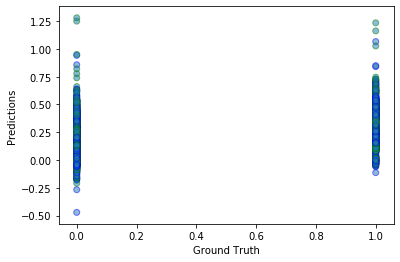

In [75]:
plt.scatter(y_test, pred_lm, edgecolor=['blue','green'], alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();